# Pf6 sanity checks

My Drive/GitHub/gtg/Pf6_sanity_checks_230319.ipynb

This code examines the frequency distribution of heterozgous genotype calls in the [Pv4 dataset](https://www.malariagen.net/sites/default/files/File8_Pf_6_README_20191010_0.txt).  It uses downloaded Zarr data and sample metadata that are stored on Google Drive\My Drive\Colab Data\Pv4\. 

#### Prior to this notebooks we have been through these steps: 

* extract lists of samples (n = 7,113) and variant properties (n = 6,051,696) as arrays

* select variants that are high-quality biallelic coding SNPs (n = 502,221)

* extract allele depth for high-quality SNPs from Zarr into `allele_depth_1.npy`.  We do this in chunks of 10,000 variants at a time to avoid memory problems

* extract sample metadata from samples.txt into a dataframe

* read info about sample QC into an array

* extract allele depth for high-quality SNPs and high-quality samples (n = 5,970) into `allele_depth_2.npy` 

* calculate within-host heterozygosity for each SNP in each sample and save to `wiho_het.npy`

* using wiho_het_per_snp, create `snp_filter` to filter out potential hyperhet SNPs

* create `sample_filter` to select samples from a particular geographical region

* calculate $\pi_W$ for each sample, using mean within-host heterozygosity per sample, and allowing for the number of SNPs ascertained and the size of coding regions

* plot a histogram of nucleotide diversity per sample

* view the histogram for different filter cutoffs for hyperhet SNPs and for different regions e.g. West Africa vs Southeast Asia

#### Data files used for this notebook

* 230318_wiho_het.npy
* 230316_region
* 230317_het_per_snp
* 230317_het_per_sample_ALL (this is filtered to SNPs with het < 0.02)

#### List of regions
* LAM=Latin America, AF=Africa, WAS=Western Asia, WSEA=Western SE Asia, ESEA=Eastern SE Asia, MSEA=Maritime SE Asia, OCE=Oceania, unassigned

In [ ]:
# FOR RUNNING ON COLAB

from google.colab import drive

drive.mount('/content/drive')

data_path = "/content/drive/My Drive/Colab Data/Pf6/"

In [1]:
# FOR RUNNING ON COLAB

import numpy as np
import json
import math
import matplotlib.pyplot as plt
import statistics as stat

In [1]:
# FOR RUNNING LOCALLY

data_path = 'G:\\My Drive\\Colab Data\\Pf6\\'

import numpy as np
import json
import math
import matplotlib.pyplot as plt
import statistics as stat

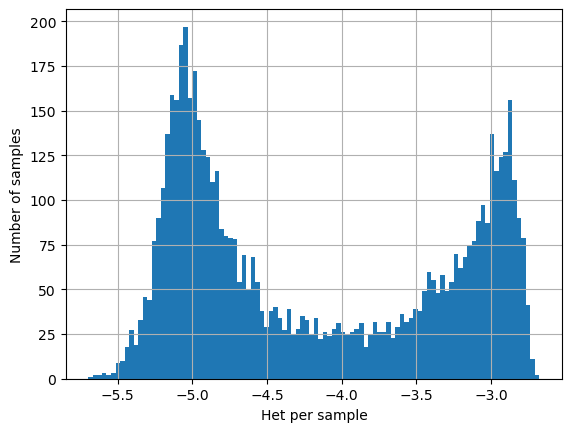

In [2]:
# All regions - only SNPs with het < 0.02

with open(data_path + "230317_het_per_sample_ALL", "r") as filepath:
    het_per_sample = json.load(filepath)
    
het_per_sample_nonzero = [x for x in het_per_sample if x != 0]
log_het_per_sample = [math.log(x, 10) for x in het_per_sample_nonzero]
plt.hist(log_het_per_sample, bins = 100)
plt.xlabel('Het per sample')
plt.ylabel('Number of samples')
plt.grid()
plt.show()


In [5]:
wiho_het = np.load(data_path + '230318_wiho_het.npy', mmap_mode = 'r')
snp_count = wiho_het.shape[0]
sample_count = wiho_het.shape[1]

sample_het = np.array(het_per_sample)

lo_het = sample_het < 3e-5
hi_het = sample_het > 3e-4
med_het = (sample_het >= 3e-5) & (sample_het <= 3e-4)

In [6]:
snp_lo = []
snp_hi = []

for i in range(snp_count):
    
    if np.any(wiho_het[i, :][lo_het]):
        
        mean_snp_het = stat.mean(wiho_het[i, :]) 
        snp_lo.append(mean_snp_het)
        
    if np.any(wiho_het[i, :][hi_het]):
        
        mean_snp_het = stat.mean(wiho_het[i, :]) 
        snp_hi.append(mean_snp_het)

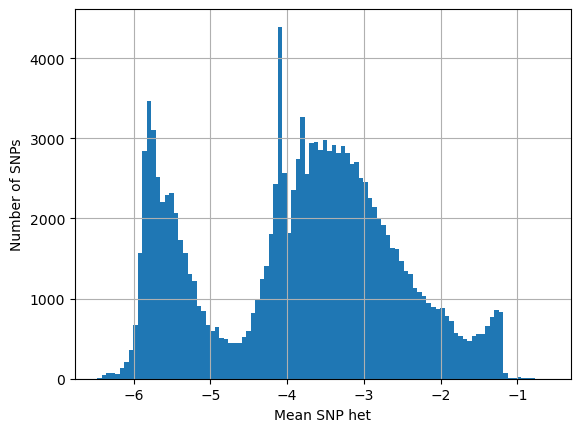

In [7]:
# SNPs present in low het samples
# .. what is their het in the full dataset

log_het_per_snp = [math.log(x, 10) for x in snp_lo]
plt.hist(log_het_per_snp, bins = 100)
plt.xlabel('Mean SNP het')
plt.ylabel('Number of SNPs')
plt.grid()
plt.show()

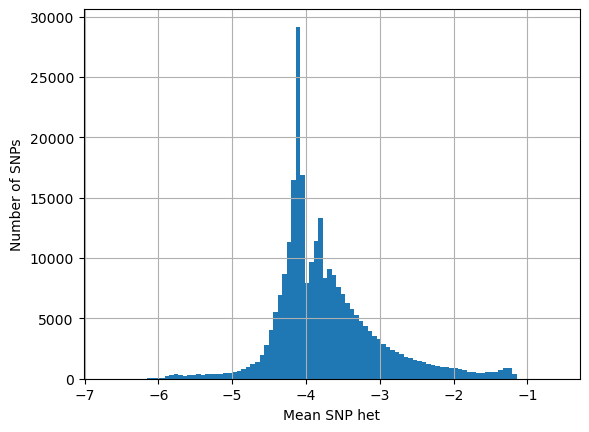

In [9]:
# SNPs present in high het samples
# .. what is their het in the full dataset

log_het_per_snp = [math.log(x, 10) for x in snp_hi]
plt.hist(log_het_per_snp, bins = 100)
plt.xlabel('Mean SNP het')
plt.ylabel('Number of SNPs')
plt.grid()
plt.show()

In [10]:
snp_hi_not_lo = []
snp_lo_not_hi = []

for i in range(snp_count):
    
    if np.any(wiho_het[i, :][hi_het]) and not np.any(wiho_het[i, :][lo_het]):
        
        mean_snp_het = stat.mean(wiho_het[i, :]) 
        snp_hi_not_lo.append(mean_snp_het)
        
    if np.any(wiho_het[i, :][lo_het]) and not np.any(wiho_het[i, :][hi_het]):
        
        mean_snp_het = stat.mean(wiho_het[i, :]) 
        snp_lo_not_hi.append(mean_snp_het)        

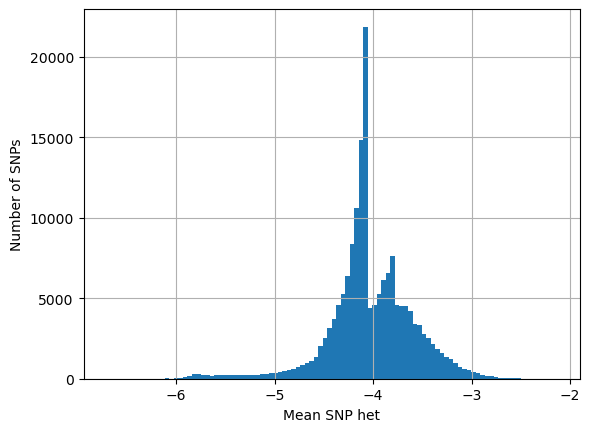

In [11]:
# SNPs present in high het samples and not low het samples
# looking at their het in the full dataset
log_het_per_snp = [math.log(x, 10) for x in snp_hi_not_lo if x != 0]
plt.hist(log_het_per_snp, bins = 100)
plt.xlabel('Mean SNP het')
plt.ylabel('Number of SNPs')
plt.grid()
plt.show()

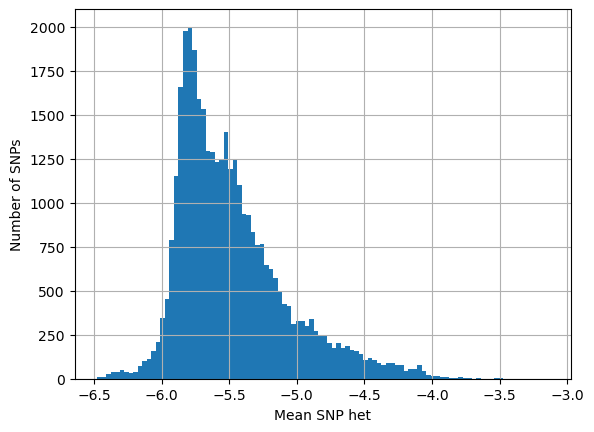

In [12]:
# SNPs present in low het samples and not high het samples
# looking at their het in the full dataset
log_het_per_snp = [math.log(x, 10) for x in snp_lo_not_hi if x != 0]
plt.hist(log_het_per_snp, bins = 100)
plt.xlabel('Mean SNP het')
plt.ylabel('Number of SNPs')
plt.grid()
plt.show()

In [ ]:
# SNPs in low het samples
#    what is their het in low het samples
#    what is their het in high het samples

# SNPs in high het samples
#    what is their het in high het samples
#    what is their het in low het samples  

snp_count = wiho_het.shape[0]
sample_count = wiho_het.shape[1]

snp_lo_lo = []
snp_lo_hi = []
snp_hi_hi = []
snp_hi_lo = []

for i in range(snp_count):
    
    if np.any(wiho_het[i, :][lo_het]):
        
        mean_snp_het = stat.mean(wiho_het[i, :][lo_het]) 
        snp_lo_lo.append(mean_snp_het)
        
        mean_snp_het = stat.mean(wiho_het[i, :][hi_het]) 
        snp_lo_hi.append(mean_snp_het)
    
    if np.any(wiho_het[i, :][hi_het]):
        
        mean_snp_het = stat.mean(wiho_het[i, :][hi_het]) 
        snp_hi_hi.append(mean_snp_het)
        
        mean_snp_het = stat.mean(wiho_het[i, :][lo_het]) 
        snp_hi_lo.append(mean_snp_het)

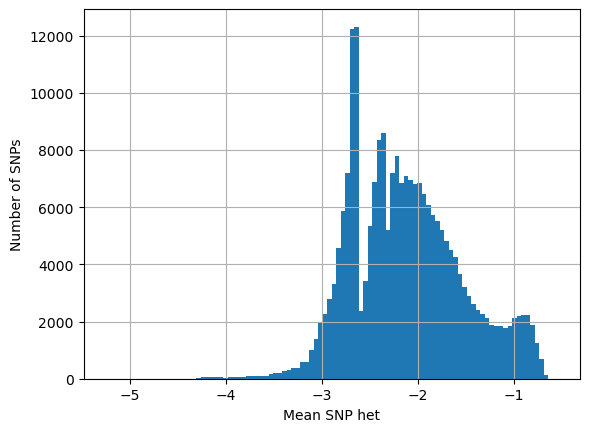

In [18]:
# SNPs present in high het samples
# looking at their het in high het samples

log_het_per_snp = [math.log(x, 10) for x in snp_hi_hi]
plt.hist(log_het_per_snp, bins = 100)
plt.xlabel('Mean SNP het')
plt.ylabel('Number of SNPs')
plt.grid()
plt.show()

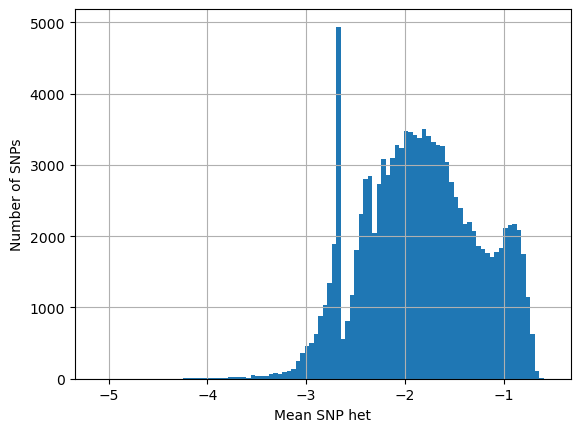

In [15]:
# SNPs present in low het samples
# looking at their het in high het samples
log_het_per_snp = [math.log(x, 10) for x in snp_lo_hi if x != 0]
plt.hist(log_het_per_snp, bins = 100)
plt.xlabel('Mean SNP het')
plt.ylabel('Number of SNPs')
plt.grid()
plt.show()

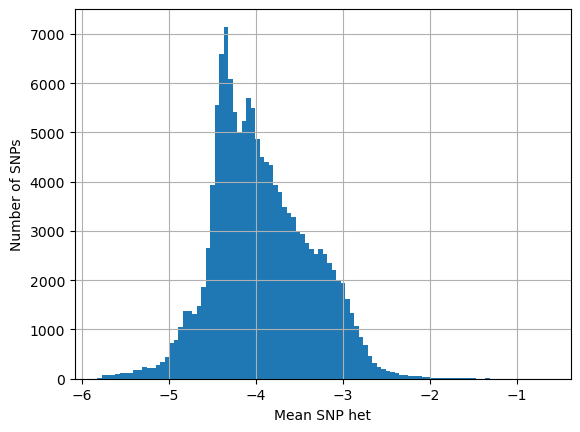

In [17]:
# SNPs present in low het samples
# looking at their het in low het samples

log_het_per_snp = [math.log(x, 10) for x in snp_lo_lo]
plt.hist(log_het_per_snp, bins = 100)
plt.xlabel('Mean SNP het')
plt.ylabel('Number of SNPs')
plt.grid()
plt.show()

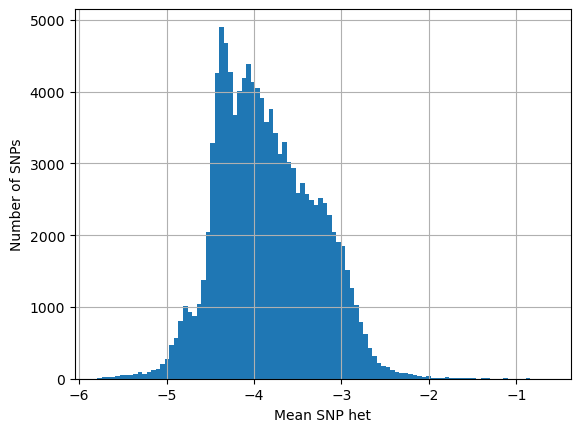

In [16]:
# SNPs present in high het samples
# looking at their het in low het samples
log_het_per_snp = [math.log(x, 10) for x in snp_hi_lo if x != 0]
plt.hist(log_het_per_snp, bins = 100)
plt.xlabel('Mean SNP het')
plt.ylabel('Number of SNPs')
plt.grid()
plt.show()